# Project: Wrangling and Analyze Data

This project is aimed to practice the skills of data wrangling using real-world data. Real-world data rarely comes clean, Data wrangling process consists of three parts: Gather, Assess and Clean. Real-world data rarely comes clean, so using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. The dataset for this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.  We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries).

## Table of Contents:

* Data Gathering

 <a href='#Data Gathering'>Link to the Data Gathering'</a>
 
 
* Assessing

 <a href='#Assessing Data'>Link to the Assessing Data'</a>


* Cleaning

 <a href='#Cleaning Data'>Link to the Cleaning Data'</a>


* Storing

 <a href='#Storing Data'>Link to the Storing Data'</a>


* Analysis and Visualization

 <a href='#Analyzing and Visualizing Data'>Link to the Analyzing and Visualizing Data'</a>

<a id='Data Gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Import statements for all packages
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import tweepy
import json
from IPython.display import Image
import os
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# script to upgrade certificate on this Workspace
!pip install --upgrade certifi 

Requirement already up-to-date: certifi in /opt/conda/lib/python3.6/site-packages (2022.9.24)


In [3]:
# Load Data
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

# Checking the firstfew values of the dataset
twitter_archives.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

#### Image Predictions

In [4]:
# Let's dowload the Image Predictions file programmatically:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

# Let's save the file
open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [5]:
# Read TSV file
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

# Checking the firstfew values of the dataset
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### Twitter API

In [6]:
# Let's download file using Requests library via URL provided to Udacity Students 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Now, we can read downloaded txt file line by line into our Pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Checking the firstfew values of the dataset
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='Assessing Data'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter

In [8]:
twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archives.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Quality:

    Some columns have NaN values
    
    Source info can not be read easily.

#### Tidiness:

    Dog type is in four columns (doggo, floofer, pupper, puppo), which suppose to be in one column.



In [10]:
# Get general info
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#filter out all the rows where retweeted_status_id is null
twitter_archives[- twitter_archives.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


#### Quality:

 *   These aren't really valid as there are duplicated tweets and we don't want retweets.
 

 *   in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers instead of float.
    
    
 *   retweeted_status_timestamp, timestamp should be datetime instead of object which is string.


 *   We may change this columns type: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id to string because We don't want any operations on them.



In [12]:
# Check for duplicates
twitter_archives.duplicated().sum()

0

In [13]:
# Check the column labels of the DataFrame
twitter_archives.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
# Return a Series containing counts of Name rows in the DataFrame.
twitter_archives['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
an           7
Bailey       7
Daisy        7
Buddy        7
Bella        6
Koda         6
Oscar        6
Stanley      6
Rusty        6
Dave         6
Jack         6
Milo         6
Leo          6
Jax          6
Scout        6
Chester      5
          ... 
Iggy         1
Snicku       1
Moofasa      1
Carper       1
Mona         1
Willow       1
Remy         1
Deacon       1
Grizzie      1
Glacier      1
Teddy        1
Sailer       1
Laela        1
Corey        1
Sailor       1
Caryl        1
Jordy        1
Wiggles      1
Chloe        1
Clarkus      1
Lilah        1
Meera        1
Timmy        1
Monkey       1
Durg         1
Coopson      1
Tebow        1
Katie        1
Tuco         1
Brudge       1
Name: name, Length: 957, dtype: int64

#### Quality:

    There are invalid names like a, an, etc., which is less than three characters.

    There are duplicated names

In [15]:
# Return a Series containing counts of rating_numerator rows in the DataFrame.
twitter_archives.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### Observation

Abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165, etc., is inappropriate

In [16]:
# Return a Series containing counts of rating_denominator rows in the DataFrame.

twitter_archives.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Observation

Abnormal values in rating_denominator, e.g., 170, 150, 130, etc, because these ratings almost always have a denominator of 10.

### Image Predictions

In [17]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
# Get general info
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# Return a random sample of items in Image Predictions Table
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
745,687494652870668288,https://pbs.twimg.com/media/CYp4vFrVAAEs9AX.jpg,1,Rottweiler,0.391471,True,miniature_pinscher,0.273595,True,Tibetan_mastiff,0.041692,True
947,704761120771465216,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,basenji,0.072097,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
818,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,soft-coated_wheaten_terrier,0.403496,True,cocker_spaniel,0.135164,True,golden_retriever,0.088719,True


In [20]:
# Testing Image
# This is an image for tweet_id: 770093767776997377
Image(url = 'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg')

In [21]:
# Overall descriptive statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# Check for duplicates
image_predictions.tweet_id.duplicated().sum()

0

In [23]:
# Return a Series containing counts of p1 rows in the DataFrame.

image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Maltese_dog                   18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [24]:
# Return a Series containing counts of p2 rows in the DataFrame.

image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
chow                               20
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [25]:
# Return a Series containing counts of p3 rows in the DataFrame.

image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

#### Observation:

  *  Inconsistent capitalization in p1, p2 and p3 columns
  
  *  Many entries are not dogs, e.g., soccer_ball, cardigan, stove, pot, mailbox, shovel, banana, etc.

### Tweet Json

In [26]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Observation:  
    Missing data probably due to retweets in twitter_archive

In [27]:
# Get general info
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [28]:
# Overall Descriptive statistics
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [29]:
# Check for duplicates
tweet_json.duplicated().sum()

0

### Quality 

1.  Some missing values in the column. Remove retweets: It is only original tweets we need.

2.  Name column contain false names like "a".

3.  Underscores in p1, p2 and p3 column

4.  Inconsistent capitalization in p1, p2 and p3 columns

5.  False predictions: predictions contain many entries that are not dogs , e.g., soccer_ball, cardigan, stove, pot,
    mailbox, shovel, banana, etc.

6.  The proportions in p1_conf, p2_conf and p3_conf columns should be percentages

7. The numerator and denominator columns have invalid values and rating containing decimal numbers in numerator

8.  Most predicted breed for each prediction level should be created.

9.  Some column headers are not descriptive e.g jpg_url

10.  Sources format are not readable.

11.  timestamp is in object instead of string and datetime and date and time should be separated

12.  Remove duplicated columns

13.  Some columns are in inappropriate data type e.g tweet_id should be a string not an integer

### Tidiness

1.  Dog type(doggo, floofer, pupper, puppo) should be in one column

2.  The three tables(twitter_archive, image_predictions and tweet_json) should be merged into one since they're all
    related to the same type of observational unit according to tidy data requirements

<a id='Cleaning Data'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data
twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

#### Merge the clean versions of twitter_archives, image_predictions, and tweet_json dataframes 

In [31]:
twitter_dogs_data = pd.concat([twitter_archives_clean, image_predictions_clean, tweet_json_clean], join='outer', axis=1)

In [32]:
twitter_dogs_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8.913276e+17,9774.0,41048.0


### Issue #1:

Removing the missing values 

#### Define:

There are some missing values in the column, so we need to remove them.

#### Code

In [33]:
# checking for missing values in the dataframe
twitter_dogs_data.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
tweet_id                       281
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog              

In [34]:
# This gives you a percentage value of missing values
(twitter_dogs_data.isna().sum()/twitter_dogs_data.shape[0])*100

# when there is too much percentage of missing values you drop the columns

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                           0.000000
doggo                          0.000000
floofer                        0.000000
pupper                         0.000000
puppo                          0.000000
tweet_id                      11.926995
jpg_url                       11.926995
img_num                       11.926995
p1                            11.926995
p1_conf                       11.926995
p1_dog                        11.926995
p2                            11.926995
p2_conf                       11.926995


In [35]:
# Let's drop missing values
twitter_dogs_data.dropna(axis=1).isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

#### Test

In [36]:
twitter_dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id                      20

#### Removing retweets

#### Define:

We only need original tweets

#### Code

In [37]:
twitter_dogs_data = twitter_dogs_data[twitter_dogs_data.retweeted_status_id.isnull()]
twitter_dogs_data = twitter_dogs_data[twitter_dogs_data.retweeted_status_user_id.isnull()]
twitter_dogs_data = twitter_dogs_data[twitter_dogs_data.retweeted_status_timestamp.isnull()]

#### Test

In [38]:
twitter_dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 32 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
tweet_id                      1896 non

#### Let's drop columns not needed

#### Code

In [39]:
# We will remove retweet and a column we won't use
twitter_dogs_data = twitter_dogs_data.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### Test

In [40]:
twitter_dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
tweet_id              1896 non-null float64
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-n

### Issue #2:

Here, we will fix the name column. It contains false names like "a"

#### Define:

Change lowercase names to None as they are wrong.

#### Code

In [41]:
#filtering out rows where there is the word 'named' in the text and the name is in lowercase - these are probably the rows where 
#the names are incorrect and then creating a list out of their corresponding indices
index_list = twitter_dogs_data.loc[twitter_dogs_data.text.str.contains('named') & 
                                              twitter_dogs_data.name.str.islower()].index.tolist()
all_indices = twitter_dogs_data.index.tolist()
for e in all_indices:
    if e in index_list:
        for ele in list(range(len(index_list))):
            #creating a list out of all such text values that contain the word 'named' and the corresponding name value 
            #is in lowercase            
            text_list = (twitter_dogs_data.loc[twitter_dogs_data.text.str.contains('named') & 
                                                 twitter_dogs_data.name.str.islower()].text).tolist()
            #finding the index position in every text value in the list where 'named' occurs
            num = text_list[ele].find('named')
            #using this index position to extract a particular pattern of dog name out of the text and then assign it to the
            #corresponding name value
            x = twitter_dogs_data.loc[twitter_dogs_data.index == e, 'text'].str[num+6:].str.extract(r'([A-Z][a-z]+)',
                                                                                                          expand = True)[0]
            twitter_dogs_data.loc[twitter_dogs_data.index == e, 'name'] = x
            break

In [42]:
#replacing the remaining 'None's in the name column by NaN values
twitter_dogs_data.name = twitter_dogs_data.name.replace('None', np.nan)
twitter_dogs_data.name.head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

#### Test

In [43]:
twitter_dogs_data.loc[twitter_dogs_data.text.str.contains('named')]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
1853,675706639471788032,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,10,10,Wylie,None,None,None,...,False,rule,0.007087,False,envelope,0.006820,False,6.755315e+17,428.0,1276.0
1955,673636718965334016,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,10,10,Kip,None,None,None,...,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True,6.735831e+17,403.0,1273.0
2034,671743150407421952,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,11,10,Jacob,None,None,None,...,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True,6.717299e+17,4795.0,9119.0
2066,671147085991960577,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,9,10,Rufus,None,None,None,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,6.711387e+17,448.0,996.0
2116,670427002554466305,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,9,10,Spork,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.704206e+17,342.0,668.0
2125,670361874861563904,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,9,10,Cherokee,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703191e+17,1359.0,4110.0
2128,670303360680108032,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,9,10,Hemry,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.700939e+17,365.0,1106.0
2146,669923323644657664,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,10,10,Alphred,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.697494e+17,71.0,289.0
2161,669564461267722241,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,10,10,Alfredo,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.693757e+17,792.0,1425.0
2166,669363888236994561,2015-11-25 03:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Gingivitis Pumpernickel named Z...,10,10,NaN,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.693544e+17,1390.0,2889.0


In [44]:
twitter_dogs_data[twitter_dogs_data.name == 'None'] # This is for checking for none values
twitter_dogs_data[twitter_dogs_data.name == 'Nan'] # Also checked for missing values and found none

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count


### Issue #3:

Replacing the Underscores

#### Define:

Replace the underscores in the p1, p2 and p3 columns by spaces

#### Code

In [45]:
# Replacing using the replace function
twitter_dogs_data.p1 = twitter_dogs_data.p1.str.replace('_',' ')
twitter_dogs_data.p2 = twitter_dogs_data.p2.str.replace('_',' ')
twitter_dogs_data.p3 = twitter_dogs_data.p3.str.replace('_',' ')

#### Test

In [46]:
twitter_dogs_data[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


### Issue #4:

Inconsistent capitalization in p1, p2 and p3 columns

#### Define:

Fixing inconsistent capitalization in p1, p2 and p3 columns

#### Code

In [47]:
# Fix capitalization by using the str.title function
twitter_dogs_data.p1 = twitter_dogs_data.p1.str.title()
twitter_dogs_data.p2 = twitter_dogs_data.p2.str.title()
twitter_dogs_data.p3 = twitter_dogs_data.p3.str.title()

#### Test

In [48]:
twitter_dogs_data[['p1', 'p2', 'p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### Let's remove the NaNs in p1, p2, p3 columns

#### Code

In [49]:
dog_breed = twitter_dogs_data[['p1', 'p2', 'p3']]
dog_breed.head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


In [50]:
dog_breed.shape

(2175, 3)

In [51]:
dog_breed.isna().sum()

p1    279
p2    279
p3    279
dtype: int64

In [52]:
dog_breed.dropna(inplace=True)

#### Test

In [53]:
dog_breed.isna().any()

p1    False
p2    False
p3    False
dtype: bool

In [54]:
dog_breed.sample(10)

,p1,p2,p3
824,Vizsla,Chesapeake Bay Retriever,Rhodesian Ridgeback
1603,Golden Retriever,Kuvasz,Labrador Retriever
1565,Old English Sheepdog,Bedlington Terrier,Kerry Blue Terrier
1175,Samoyed,Pomeranian,Maltese Dog
2054,French Bulldog,Pug,Bull Mastiff
1781,Hippopotamus,Mexican Hairless,Ice Lolly
378,Airedale,Brown Bear,Chesapeake Bay Retriever
350,Doberman,Rottweiler,Appenzeller
697,Chihuahua,Siamese Cat,Macaque
1796,Old English Sheepdog,Tibetan Terrier,Guinea Pig


In [55]:
dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 3 columns):
p1    1896 non-null object
p2    1896 non-null object
p3    1896 non-null object
dtypes: object(3)
memory usage: 59.2+ KB


In [56]:
twitter_dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
tweet_id              1896 non-null float64
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-n

### Issue #5:

False predictions: predictions contain many entries that are not dogs

#### Define:

Drop each of the false row prediction

#### Code

In [57]:
false_predictions = ~((twitter_dogs_data.p1_dog) | (twitter_dogs_data.p2_dog) | (twitter_dogs_data.p3_dog))
false_predictions_dog = twitter_dogs_data[false_predictions].index.tolist()

In [58]:
len(twitter_dogs_data[false_predictions])

564

In [59]:
twitter_dogs_data.drop(false_predictions_dog, inplace = True)

In [60]:
twitter_dogs_data = twitter_dogs_data.reset_index(drop = True)

#### Test

In [61]:
false_predictions = ~((twitter_dogs_data.p1_dog) | (twitter_dogs_data.p2_dog) | (twitter_dogs_data.p3_dog))

len(twitter_dogs_data[false_predictions])

0

### Issue #6:

The proportions in p1_conf, p2_conf and p3_conf columns should be percentages

#### Define:

Convert the proportions in the p1_conf, p2_conf and p3_conf columns into percentages

In [62]:
#using apply, multiplying 100 to each column value in each row
twitter_dogs_data.p1_conf = twitter_dogs_data.p1_conf.apply(lambda x: round(x*100, 2))
twitter_dogs_data.p2_conf = twitter_dogs_data.p2_conf.apply(lambda x: round(x*100, 2))
twitter_dogs_data.p3_conf = twitter_dogs_data.p3_conf.apply(lambda x: round(x*100, 2))

In [63]:
twitter_dogs_data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,True,Collie,15.67,True,Shetland Sheepdog,6.14,True,8.924206e+17,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,True,Miniature Pinscher,7.42,True,Rhodesian Ridgeback,7.20,True,8.921774e+17,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,...,True,Malinois,13.86,True,Bloodhound,11.62,True,8.918152e+17,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,...,True,Redbone,36.07,True,Miniature Pinscher,22.28,True,8.916896e+17,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,...,True,Rottweiler,24.37,True,Doberman,15.46,True,8.913276e+17,9774.0,41048.0


### Issue #7:

The numerator and denominator columns have invalid values.

#### Define:

Fix rating numerator and denominators that are not ratings

#### Code

In [64]:
tmp_rating = twitter_dogs_data[twitter_dogs_data.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

for i in tmp_rating:
    x = twitter_dogs_data.text == i
    column_1 = 'rating_numerator'
    column_2 = 'rating_denominator'
    twitter_dogs_data.loc[x, column_1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    twitter_dogs_data.loc[x, column_2] = 10

#### Test

In [65]:
twitter_dogs_data[twitter_dogs_data.text.isin(tmp_rating)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
42,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,13,10,NaN,None,None,None,...,True,Vizsla,9.10,True,Kelpie,2.30,True,8.815360e+17,16570.0,50199.0
200,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,13,10,NaN,None,None,None,...,True,Black-And-Tan Coonhound,27.09,True,Rottweiler,15.32,True,8.351728e+17,6516.0,28552.0
486,777684233540206592,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",11,10,NaN,None,None,None,...,True,Golden Retriever,5.41,True,Airedale,3.06,True,7.776419e+17,4947.0,0.0
673,747600769478692864,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,7,10,Bookstore,None,None,None,...,True,Wire-Haired Fox Terrier,8.35,True,English Setter,8.32,True,7.475127e+17,1803.0,6110.0
723,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",14,10,NaN,None,None,None,...,True,French Bulldog,1.97,True,Bull Mastiff,0.23,True,7.403590e+17,967.0,3610.0
842,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,11,10,Bluebert,None,None,None,...,True,Pug,1.49,True,Pekinese,1.28,True,7.160809e+17,1935.0,5272.0
857,714258258790387713,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,8,10,Travis,None,None,None,...,True,Pomeranian,1.22,True,White Wolf,0.48,False,7.142141e+17,990.0,2480.0
975,703356393781329922,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,2,10,Socks,None,None,None,...,True,Cocker Spaniel,10.58,True,Borzoi,7.39,True,7.030791e+17,3494.0,8064.0
1061,695064344191721472,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,13,10,NaN,None,None,None,...,True,Cocker Spaniel,1.59,True,Lhasa,0.65,True,6.949258e+17,1043.0,2965.0
1066,694352839993344000,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,5,10,Oliviér,None,None,None,...,True,Irish Terrier,12.15,True,Lakeland Terrier,1.46,True,6.943297e+17,569.0,2203.0


### Rating containing decimal numbers in numerator.

#### Define:

Clean decimal values in rating numerators.

#### Code

In [66]:
twitter_dogs_data[twitter_dogs_data.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
438,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,...,True,Chesapeake Bay Retriever,19.49,True,American Staffordshire Terrier,5.95,True,7.866650e+17,2996.0,11957.0
1269,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,5,10,NaN,None,None,None,...,True,Norwegian Elkhound,14.00,True,Malinois,2.48,True,6.813202e+17,863.0,2918.0
1291,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,10,NaN,None,None,None,...,True,Chesapeake Bay Retriever,13.72,True,Malamute,7.14,True,6.804404e+17,564.0,1583.0


In [67]:
ratings = twitter_dogs_data.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,14,10
9,13,10


In [68]:
#Convert the null values to None type
twitter_dogs_data['rating_numerator'] = ratings[0]

#### Test

In [69]:
twitter_dogs_data[twitter_dogs_data.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,retweet_count,favorite_count
438,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,None,None,None,...,True,Chesapeake Bay Retriever,19.49,True,American Staffordshire Terrier,5.95,True,7.866650e+17,2996.0,11957.0
1269,681340665377193984,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,9.5,10,NaN,None,None,None,...,True,Norwegian Elkhound,14.00,True,Malinois,2.48,True,6.813202e+17,863.0,2918.0
1291,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,11.26,10,NaN,None,None,None,...,True,Chesapeake Bay Retriever,13.72,True,Malamute,7.14,True,6.804404e+17,564.0,1583.0


### Issue #8:

Most predicted breed for each prediction level should be created.

#### Define:

Create top accurate predicted dog breed in a column and drop p1,p2,p3 related columns

#### Code

In [70]:
columns = ['p1_dog','p2_dog','p3_dog']
pred = []
preds = []

for index in range(twitter_dogs_data.shape[0]):
    for col in columns:
        if twitter_dogs_data.loc[index,col] == True:
            pred.append(col)
    preds.append(pred)
    pred = []

In [71]:
corresponding_columns = {'p1_dog': ['p1','p1_conf'], 'p2_dog': ['p2','p2_conf'], 'p3_dog': ['p3','p3_conf']}
prediction1 = []
conf1 = []

for index in range(twitter_dogs_data.shape[0]):
    prediction1.append(twitter_dogs_data.loc[index,corresponding_columns[preds[index][0]][0]])
    conf1.append(twitter_dogs_data.loc[index,corresponding_columns[preds[index][0]][1]])

prediction1 = pd.Series(prediction1)
conf1 = pd.Series(conf1)

In [72]:
twitter_dogs_data = pd.concat([twitter_dogs_data, prediction1,conf1], axis=1, join = 'outer')

In [73]:
twitter_dogs_data.rename(columns={0: "dog_breed_prediction", 1: "confidence_percentage"}, inplace = True)

In [74]:
twitter_dogs_data.drop(columns=['p1', 'p2','p3','p1_conf','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], inplace = True)

#### Test

In [75]:
twitter_dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 19 columns):
tweet_id                 1611 non-null int64
timestamp                1611 non-null object
source                   1611 non-null object
text                     1611 non-null object
rating_numerator         1611 non-null object
rating_denominator       1611 non-null int64
name                     1111 non-null object
doggo                    1611 non-null object
floofer                  1611 non-null object
pupper                   1611 non-null object
puppo                    1611 non-null object
tweet_id                 1611 non-null float64
jpg_url                  1611 non-null object
img_num                  1611 non-null float64
tweet_id                 1611 non-null float64
retweet_count            1611 non-null float64
favorite_count           1611 non-null float64
dog_breed_prediction     1611 non-null object
confidence_percentage    1611 non-null float64
dtypes: float64

In [76]:
twitter_dogs_data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,img_num,tweet_id,retweet_count,favorite_count,dog_breed_prediction,confidence_percentage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,8.924206e+17,8853.0,39467.0,Welsh Springer Spaniel,46.51
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,8.921774e+17,6514.0,33819.0,Redbone,50.68
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,8.918152e+17,4328.0,25461.0,German Shepherd,59.65
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,8.916896e+17,8964.0,42908.0,Rhodesian Ridgeback,40.81
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,8.913276e+17,9774.0,41048.0,Miniature Pinscher,56.03


### Issue #9:

Some column headers are not descriptive

#### Define:

Change column headers to be more readable column names e.g, the column name of jpg_url for better viewing.

#### Code

In [77]:
twitter_dogs_data.rename(columns={'jpg_url': 'image_url', 'name': "dog_name"}, inplace = True)

#### Test

In [78]:
twitter_dogs_data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_id,image_url,img_num,tweet_id,retweet_count,favorite_count,dog_breed_prediction,confidence_percentage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,8.924206e+17,8853.0,39467.0,Welsh Springer Spaniel,46.51
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,8.921774e+17,6514.0,33819.0,Redbone,50.68
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,8.918152e+17,4328.0,25461.0,German Shepherd,59.65
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,8.916896e+17,8964.0,42908.0,Rhodesian Ridgeback,40.81
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,8.913276e+17,9774.0,41048.0,Miniature Pinscher,56.03


### Issue #10:

Sources format are not readable.

#### Define:

Make 'source' column clean and readable.

#### Code

In [79]:
twitter_dogs_data['source'] = twitter_dogs_data['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [80]:
twitter_dogs_data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_id,image_url,img_num,tweet_id,retweet_count,favorite_count,dog_breed_prediction,confidence_percentage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,8.924206e+17,8853.0,39467.0,Welsh Springer Spaniel,46.51
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,8.921774e+17,6514.0,33819.0,Redbone,50.68
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,8.918152e+17,4328.0,25461.0,German Shepherd,59.65
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,8.916896e+17,8964.0,42908.0,Rhodesian Ridgeback,40.81
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,8.913276e+17,9774.0,41048.0,Miniature Pinscher,56.03


### Issue #11:

timestamp is in object instead of string and datetime

#### Define:

timestamp should be in datetime format and date and time should be separated

#### Code

In [81]:
twitter_dogs_data.timestamp = pd.to_datetime(twitter_dogs_data.timestamp, yearfirst = True)

In [82]:
#using the apply function, applying the strftime function to each value of the timestamp column in each row
twitter_dogs_data['date'] = twitter_dogs_data['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
twitter_dogs_data['time'] = twitter_dogs_data['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

#changing datatype of the date column to datetime
twitter_dogs_data.date = pd.to_datetime(twitter_dogs_data.date, dayfirst = True)

In [83]:
#Now, let's drop the timestamp column
twitter_dogs_data = twitter_dogs_data.drop('timestamp', axis = 1)

#### Test

In [84]:
twitter_dogs_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 20 columns):
tweet_id                 1611 non-null int64
source                   1611 non-null object
text                     1611 non-null object
rating_numerator         1611 non-null object
rating_denominator       1611 non-null int64
dog_name                 1111 non-null object
doggo                    1611 non-null object
floofer                  1611 non-null object
pupper                   1611 non-null object
puppo                    1611 non-null object
tweet_id                 1611 non-null float64
image_url                1611 non-null object
img_num                  1611 non-null float64
tweet_id                 1611 non-null float64
retweet_count            1611 non-null float64
favorite_count           1611 non-null float64
dog_breed_prediction     1611 non-null object
confidence_percentage    1611 non-null float64
date                     1611 non-null datetime64[ns]
time   

### Issue #12:

Duplicated Columns

#### Define:

Remove duplicated columns

#### Code

In [85]:
twitter_dogs_data = twitter_dogs_data.loc[:,~twitter_dogs_data.columns.duplicated()]

#### Test

In [86]:
twitter_dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
tweet_id                 1611 non-null int64
source                   1611 non-null object
text                     1611 non-null object
rating_numerator         1611 non-null object
rating_denominator       1611 non-null int64
dog_name                 1111 non-null object
doggo                    1611 non-null object
floofer                  1611 non-null object
pupper                   1611 non-null object
puppo                    1611 non-null object
image_url                1611 non-null object
img_num                  1611 non-null float64
retweet_count            1611 non-null float64
favorite_count           1611 non-null float64
dog_breed_prediction     1611 non-null object
confidence_percentage    1611 non-null float64
date                     1611 non-null datetime64[ns]
time                     1611 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object

### Dog Type

#### Define:

Dog type(doggo, floofer, pupper, puppo) should be in one column

#### Code

In [87]:
# Checking for multiple stages
twitter_dogs_data[['doggo','floofer','pupper','puppo']].sum(axis=1).unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneflooferNoneNone', 'NoneNonepupperNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [88]:
twitter_dogs_data['multiple_stages'] = twitter_dogs_data[['doggo','floofer','pupper','puppo']].sum(axis=1) == 2
multiple_stages = twitter_dogs_data.query('multiple_stages == True')[['text', 'doggo','floofer','pupper','puppo']]
multiple_stages.shape

(0, 5)

In [89]:
twitter_dogs_data['dog_type'] = twitter_dogs_data[
    ['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ', '.join(x), axis=1)

In [90]:
twitter_dogs_data.drop(columns = ['doggo', 'floofer','pupper','puppo'], inplace = True)

In [91]:
twitter_dogs_data = twitter_dogs_data.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')

In [92]:
twitter_dogs_data = twitter_dogs_data.replace(regex=r'', value= np.nan)

#### Test

In [93]:
twitter_dogs_data.dog_type.value_counts()

pupper            191
doggo              63
puppo              20
floofer             9
doggo, pupper       8
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

In [94]:
twitter_dogs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 16 columns):
tweet_id                 1611 non-null int64
source                   1611 non-null object
text                     1611 non-null object
rating_numerator         1611 non-null object
rating_denominator       1611 non-null int64
dog_name                 1111 non-null object
image_url                1611 non-null object
img_num                  1611 non-null float64
retweet_count            1611 non-null float64
favorite_count           1611 non-null float64
dog_breed_prediction     1611 non-null object
confidence_percentage    1611 non-null float64
date                     1611 non-null datetime64[ns]
time                     1611 non-null object
multiple_stages          1611 non-null bool
dog_type                 293 non-null object
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(8)
memory usage: 190.4+ KB


In [95]:
twitter_dogs_data.head()

,tweet_id,source,text,rating_numerator,rating_denominator,dog_name,image_url,img_num,retweet_count,favorite_count,dog_breed_prediction,confidence_percentage,date,time,multiple_stages,dog_type
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,8853.0,39467.0,Welsh Springer Spaniel,46.51,2017-08-01,16:23:56,False,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,6514.0,33819.0,Redbone,50.68,2017-08-01,00:17:27,False,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,4328.0,25461.0,German Shepherd,59.65,2017-07-31,00:18:03,False,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,8964.0,42908.0,Rhodesian Ridgeback,40.81,2017-07-30,15:58:51,False,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,9774.0,41048.0,Miniature Pinscher,56.03,2017-07-29,16:00:24,False,NaN


### Issue #13:

Data Types

#### Define:

Change datatypes 

#### Code

In [96]:
twitter_dogs_data['tweet_id'] = twitter_dogs_data['tweet_id'].astype(str)

twitter_dogs_data['dog_type'] = twitter_dogs_data['dog_type'].astype('category')

twitter_dogs_data['source'] = twitter_dogs_data['source'].astype('category')

twitter_dogs_data['rating_numerator'] = twitter_dogs_data['rating_numerator'].astype(float)

twitter_dogs_data['rating_denominator'] = twitter_dogs_data['rating_denominator'].astype(float)

#### Test

In [97]:
twitter_dogs_data.dtypes

tweet_id                         object
source                         category
text                             object
rating_numerator                float64
rating_denominator              float64
dog_name                         object
image_url                        object
img_num                         float64
retweet_count                   float64
favorite_count                  float64
dog_breed_prediction             object
confidence_percentage           float64
date                     datetime64[ns]
time                             object
multiple_stages                    bool
dog_type                       category
dtype: object

<a id='Storing Data'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [98]:
twitter_dogs_data.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

<a id='Analyzing and Visualizing Data'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [99]:
df = pd.read_csv('twitter_archive_master.csv')

In [100]:
# Get general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 16 columns):
tweet_id                 1611 non-null int64
source                   1611 non-null object
text                     1611 non-null object
rating_numerator         1611 non-null float64
rating_denominator       1611 non-null float64
dog_name                 1111 non-null object
image_url                1611 non-null object
img_num                  1611 non-null float64
retweet_count            1611 non-null float64
favorite_count           1611 non-null float64
dog_breed_prediction     1611 non-null object
confidence_percentage    1611 non-null float64
date                     1611 non-null object
time                     1611 non-null object
multiple_stages          1611 non-null bool
dog_type                 293 non-null object
dtypes: bool(1), float64(6), int64(1), object(8)
memory usage: 190.4+ KB


In [101]:
# Convert columns to their appropriate types and set the timestamp as an index
df['tweet_id'] = df['tweet_id'].astype(object)
df['source'] = df['source'].astype('category')
df['multiple_stages'] = df['multiple_stages'].astype('category')
df['dog_type'] = df['dog_type'].astype('category')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 16 columns):
tweet_id                 1611 non-null object
source                   1611 non-null category
text                     1611 non-null object
rating_numerator         1611 non-null float64
rating_denominator       1611 non-null float64
dog_name                 1111 non-null object
image_url                1611 non-null object
img_num                  1611 non-null float64
retweet_count            1611 non-null float64
favorite_count           1611 non-null float64
dog_breed_prediction     1611 non-null object
confidence_percentage    1611 non-null float64
date                     1611 non-null object
time                     1611 non-null object
multiple_stages          1611 non-null category
dog_type                 293 non-null category
dtypes: category(3), float64(6), object(7)
memory usage: 169.1+ KB


In [103]:
df['multiple_stages'].value_counts()

False    1611
Name: multiple_stages, dtype: int64

In [104]:
df.drop(columns = ['multiple_stages'], inplace = True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 15 columns):
tweet_id                 1611 non-null object
source                   1611 non-null category
text                     1611 non-null object
rating_numerator         1611 non-null float64
rating_denominator       1611 non-null float64
dog_name                 1111 non-null object
image_url                1611 non-null object
img_num                  1611 non-null float64
retweet_count            1611 non-null float64
favorite_count           1611 non-null float64
dog_breed_prediction     1611 non-null object
confidence_percentage    1611 non-null float64
date                     1611 non-null object
time                     1611 non-null object
dog_type                 293 non-null category
dtypes: category(2), float64(6), object(7)
memory usage: 167.4+ KB


<a id='Insights and Visualization'></a>
### Insights and Visualization:

1.  The most popular dog type:

  -   By rating ratio
  -   By favorite count
  -   By retweet count


2.  The most popular dog breed:

  -   By rating ratio
  -   By favorite count
  -   By retweet count


3.  The relationship between retweets and favorites

### The most popular dog type

In [106]:
df['rating_ratio'] = df['rating_numerator'] / df['rating_denominator']

In [107]:
df['dog_type'].value_counts()

pupper            191
doggo              63
puppo              20
floofer             9
doggo, pupper       8
doggo, puppo        1
doggo, floofer      1
Name: dog_type, dtype: int64

In [108]:
# Remove missing stages, the stages that only have one sample size, and outliers
stage = df.query('dog_type !="" & dog_type != "doggo, puppo" & dog_type != "doggo, floofer"')
stage['dog_type'].value_counts()

pupper            191
doggo              63
puppo              20
floofer             9
doggo, pupper       8
doggo, puppo        0
doggo, floofer      0
Name: dog_type, dtype: int64

### By Rating Ratio

In [109]:
stage.groupby('dog_type')['rating_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,63.0,1.182540,0.137418,0.8,1.100,1.2,1.3,1.4
"doggo, floofer",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"doggo, pupper",8.0,1.087500,0.253194,0.5,1.075,1.2,1.2,1.3
"doggo, puppo",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,9.0,1.188889,0.105409,1.0,1.100,1.2,1.3,1.3
pupper,191.0,1.067016,0.171713,0.3,1.000,1.1,1.2,1.4
puppo,20.0,1.185000,0.130888,0.9,1.100,1.2,1.3,1.4


### By Favorite Count

In [110]:
stage.groupby('dog_type')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,63.0,12175.317460,11419.241075,0.0,4037.5,8157.0,20181.00,43694.0
"doggo, floofer",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"doggo, pupper",8.0,6148.500000,5492.964097,0.0,2831.5,3795.5,10913.50,14015.0
"doggo, puppo",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,9.0,9425.333333,11714.938796,0.0,2651.0,5094.0,10681.00,37914.0
pupper,191.0,6038.198953,8846.010750,0.0,1932.5,2890.0,6429.50,67100.0
puppo,20.0,11773.000000,11930.784180,0.0,0.0,9930.0,16072.25,38818.0


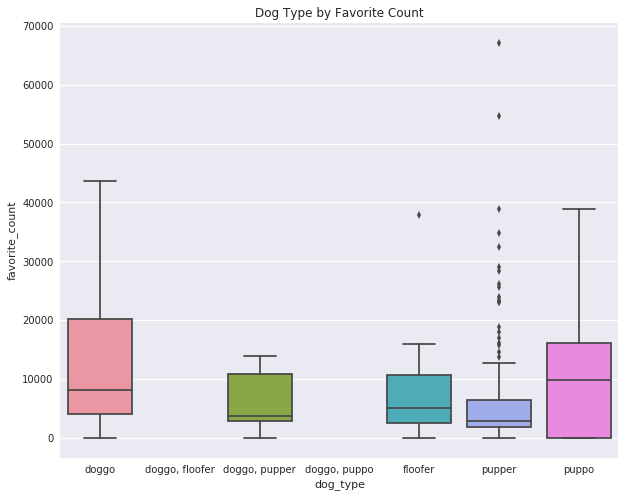

In [111]:
#Now, let's plot a boxplot
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
sns.boxplot(x='dog_type', y="favorite_count", data=stage).set_title('Dog Type by Favorite Count')
plt.savefig('stage_fav.png');

### By Retweet Counts

In [112]:
stage.groupby('dog_type')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,63.0,4956.000000,4853.681343,10.0,1899.00,3884.0,6229.50,24319.0
"doggo, floofer",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"doggo, pupper",8.0,2311.125000,1802.520254,113.0,1047.25,1730.5,3653.25,5247.0
"doggo, puppo",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,9.0,3191.111111,2812.196448,764.0,1226.00,1714.0,4581.00,8329.0
pupper,191.0,2413.895288,3953.312856,97.0,640.50,1045.0,2241.00,31989.0
puppo,20.0,5207.800000,4608.195190,135.0,2175.25,4272.0,6611.50,18963.0


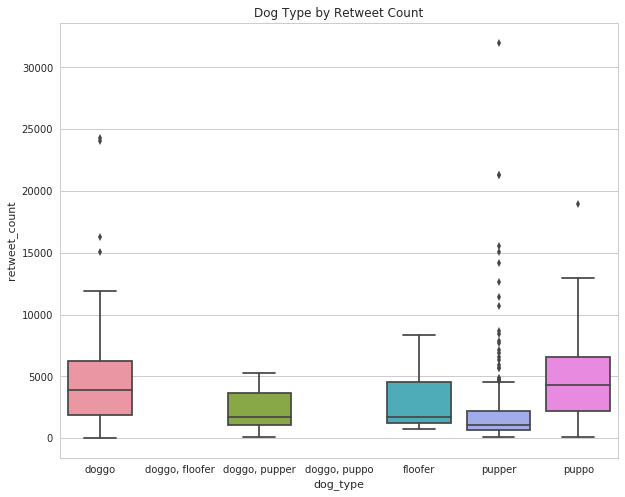

In [113]:
#Now, let's plot a boxplot
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.boxplot(x='dog_type', y="retweet_count", data=stage).set_title('Dog Type by Retweet Count')
plt.savefig('stag_fav.png');

#### As you can see, the most popular dog type is Pupper

### The most popular dog breed

In [114]:
df.dog_breed_prediction.value_counts().head(5)

Golden Retriever      165
Labrador Retriever    102
Chihuahua              88
Pembroke               85
Pug                    63
Name: dog_breed_prediction, dtype: int64

In [115]:
# Find out the top 5 breed that has the most images
array = ['Golden_Retriever','Labrador_Retriever','Chihuahua','Pembroke','Pug']
new_df = df.loc[df['dog_breed_prediction'].isin(array)]

### By Rating Ratio

In [116]:
new_df.groupby('dog_breed_prediction').rating_ratio.describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed_prediction,,,,,,,,
Chihuahua,88.0,1.170455,0.467854,0.2,1.1,1.2,1.3,5.0
Pembroke,85.0,1.052941,0.215798,0.3,1.0,1.1,1.2,1.4
Pug,63.0,1.096825,0.194246,0.3,1.0,1.1,1.2,1.4


In [117]:
new_df.groupby('dog_breed_prediction')['dog_type'].value_counts()

dog_breed_prediction  dog_type     
Chihuahua             pupper           7
                      doggo            3
                      puppo            2
                      doggo, pupper    1
Pembroke              pupper           6
                      doggo            5
Pug                   doggo            3
                      pupper           3
                      puppo            2
                      floofer          1
Name: dog_type, dtype: int64

### By Favorite Count

In [118]:
new_df.groupby('dog_breed_prediction')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed_prediction,,,,,,,,
Chihuahua,88.0,9646.522727,10126.887452,0.0,2742.25,5665.5,13032.0,40325.0
Pembroke,85.0,7362.988235,9112.917834,0.0,2056.00,4249.0,7620.0,38074.0
Pug,63.0,7529.539683,7676.342547,0.0,1580.00,5565.0,12065.5,35553.0


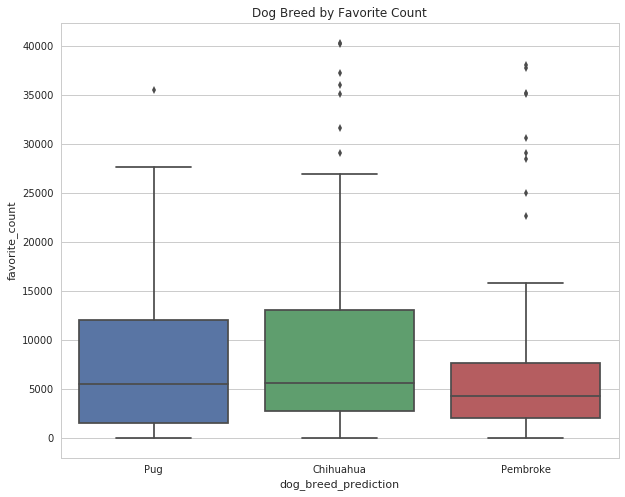

In [119]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dog_breed_prediction', y="favorite_count", data=new_df).set_title('Dog Breed by Favorite Count')
plt.savefig('breed_fav.png');

### By Retweet Counts

In [120]:
new_df.groupby('dog_breed_prediction')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed_prediction,,,,,,,,
Chihuahua,88.0,4019.977273,6750.211106,213.0,1158.5,2252.5,4294.0,56625.0
Pembroke,85.0,2661.929412,3061.029751,119.0,786.0,1561.0,3282.0,17465.0
Pug,63.0,2960.174603,2923.306290,39.0,991.0,2013.0,3806.5,14740.0


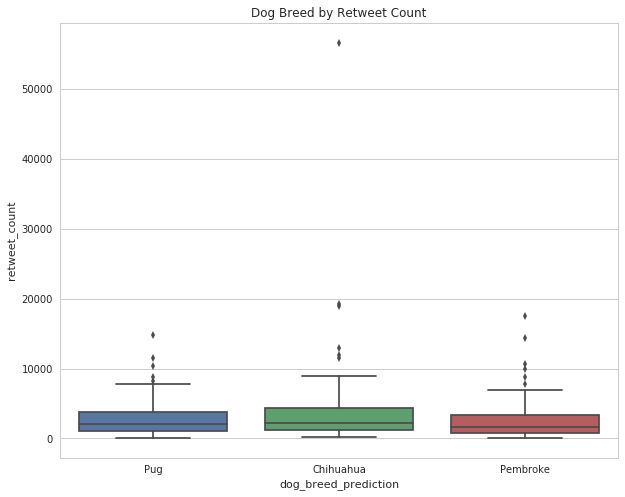

In [121]:
plt.figure(figsize=(10,8))
sns.boxplot(x='dog_breed_prediction', y="retweet_count", data=new_df).set_title('Dog Breed by Retweet Count')
plt.savefig('breed_retw.png');

#### Now, you see that the most popular dog breed is Chihuahua

### The relationship between retweets and favorites

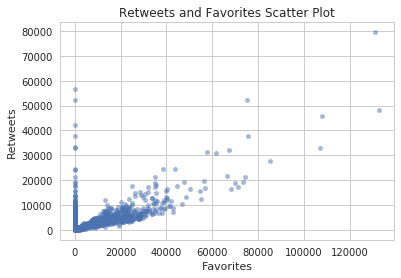

In [122]:
#Retweets vs. Favorites

df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorites Scatter Plot')

plt.savefig('Retweets_vs_Favorites.png', bbox_inches='tight')

#### Here, we can see that Retweets are positively correlated with Favorites.

## References:

*   https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes/44338256
    
*   https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
    
*   Data Analysis Nanodegree/Data Wrangling/Lesson 3: Assessing Data/Concepts 4-18
    
*   https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt
    
*   https://stackoverflow.com/questions/44594945/pandas-str-replace-regex-application
    
*   https://pandas.pydata.org
    
*   https://www.w3resource.com/pandas/series/series-str-islower.php
    
*   https://docs.python.org
    
*   https://thepythonguru.com
    
*   https://ipython.org

*   https://sebastianraschka.com/Articles/2014_ipython_internal_links.html#bottom    

*  https://medium.com/@sambozek/ipython-er-jupyter-table-of-contents-69bb72cf39d3